In [1]:
from statistics import mode
from docx import *
import re
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import spacy

In [2]:
doc_path = '../data/raw/pdf/7kLHJ-F33GI/statbook.docx'

In [3]:
word_document = Document(doc_path)

In [4]:
p_sent = re.compile('\w+')
p_letter = re.compile('[a-zA-Z]')

In [5]:
full_text = []
font_sizes = []
for para in word_document.paragraphs:
    for i,run in enumerate(para.runs):        
        matching = p_sent.match(run.text)
        
        # see if there is a number or letter ( it is not a trash)
        if matching is not None:
                full_text.append(run.text)
                font_sizes.append(run.font.size)
                
'''        matching = p_sent.match(run.text)
        
        # see if there is a number or letter ( it is not a trash)
        if matching is not None:
            
            # see if it is only a section numbering 
            # if it is then union it with the topic label
            matching = p_letter.match(run.text)            
            if matching is None:
                para.runs[i+1].text = para.runs[i].text + " " + para.runs[i+1].text
            else:
                full_text.append(run.text)
                font_sizes.append(run.font.size)'''

'        matching = p_sent.match(run.text)\n        \n        # see if there is a number or letter ( it is not a trash)\n        if matching is not None:\n            \n            # see if it is only a section numbering \n            # if it is then union it with the topic label\n            matching = p_letter.match(run.text)            \n            if matching is None:\n                para.runs[i+1].text = para.runs[i].text + " " + para.runs[i+1].text\n            else:\n                full_text.append(run.text)\n                font_sizes.append(run.font.size)'

In [6]:
full_text

['An Introduction to the Science of Statistics:',
 'From Theory to Implementation',
 'Preliminary Edition',
 'c ',
 'Joseph C. Watkins',
 'Contents',
 'i',
 'ii',
 'iii',
 'iv',
 'v',
 'Introduction to the Science of Statistics',
 'vi',
 'Preface',
 'Statistical thinking will one day be as necessary a qualification for efficient citizenship as the ability to read and write. – Samuel Wilkes, 1951, paraphrasing H. G. Wells from Mankind in the Making',
 'The value of statistical thinking is now accepted by researchers and practitioners from a broad range of endeavors. This viewpoint has become common wisdom in a world of big data. The challenge for statistics educators is to adapt their pedagogy to accommodate the circumstances associated to the information age. This choice of pedagogy should be attuned to the quantitative capabilities and scientific background of the students as well as the intended use of their newly acquired knowledge of statistics.',
 'Many university students, presum

In [7]:
most_common_font_size = mode(font_sizes)

In [69]:
topic_titles = []
key_word_='Topic'
main_chapter_titles = []
p_Start_Section = re.compile('{} \d?'.format(key_word_))
p_subsection_numbering = re.compile(r'^((\d+\.)+\d*)$')
p_words = re.compile('[A-Za-z]+')
total_corpus = []
chapter_corpus = ""

for i,(doc_size,doc_text) in enumerate(zip(font_sizes,full_text)):
    ''' if it is a header '''
    if(doc_size > most_common_font_size):
        is_title = False
        matching_start_chapter = p_Start_Section.match(doc_text)       
        # if it is start of new chapter\main topic
        if matching_start_chapter is not None:
            topic_titles.append(full_text[i+1])
            main_chapter_titles.append(full_text[i+1])
            is_title = True
        else:
            # if it is a start of sub topic
            '''comes from the structure in the input array as:
            [
                1.1
                Types of Data
            ]
            
            '''
            matching_start_section_numbering = p_subsection_numbering.match(doc_text)    
            matching_words = p_words.match(full_text[i+1])
            if matching_start_section_numbering is not None and matching_words is not None:
                sub_section = ("%s %s" %(full_text[i],full_text[i+1]))
                is_title = True
                topic_titles.append(sub_section)
        if is_title:
            total_corpus.append(chapter_corpus[1:])
            chapter_corpus = ""
    
    else:#elif doc_size == most_common_font_size:
        chapter_corpus = chapter_corpus + ' ' + doc_text
        

In [70]:
topic_titles

['Displaying Data',
 '1.1 Types of Data',
 '1.2 Categorical Data',
 '1.2.1 Pie Chart',
 '1.2.2 Bar Charts',
 '1.3 Two-way Tables',
 '1.4 Histograms and the Empirical Cumulative Distribution Function',
 '1.5 Scatterplots',
 '1.6 Time Plots',
 '1.7 Answers to Selected Exercises',
 'Describing Distributions with Numbers',
 '2.1 Measuring Center',
 '2.1.1 Medians',
 '2.1.2 Means',
 '2.2 Measuring Spread',
 '2.2.1 Five Number Summary',
 '2.2.2 Sample Variance and Standard Deviation',
 '2.3 Quantiles and Standardized Variables',
 '2.4 Quantile-Quantile Plots',
 '2.5 Answers to Selected Exercises',
 'Correlation and Regression',
 '3.1 Covariance and Correlation',
 '3.2 Linear Regression',
 '3.2.1 Transformed Variables',
 '3.3 Extensions',
 '3.3.1 Nonlinear Regression',
 '3.3.2 Multiple Linear Regression',
 '3.4 Answers to Selected Exercises',
 'Producing Data',
 '4.1 Preliminary Steps',
 '4.2 Professional Ethics',
 '4.3 Formal Statistical Procedures',
 '4.3.1 Observational Studies',
 '4.3.2 R

In [10]:
total_corpus[2]

'A data set provides information about a group of individuals. These individuals are, typically, representatives chosen from a population under study. Data on the individuals are meant, either informally or formally, to allow us to make inferences about the population. We shall later discuss how to define a population, how to choose individuals in the population and how to collect data on these individuals. Individuals are the objects described by the data. Variables are characteristics of an individual. In order to present data, we must first recognize the types of data under consideration. Example 1.1 (individuals and variables). We consider two populations - the first is the nations of the world and the second is the people who live in those countries. Below is a collection of variables that might be used to study these populations. 3 Exercise 1.2. Classify the variables as quantitative or categorical in the example above. The naming of variables and their classification as categori

In [11]:
print(len(total_corpus))
print(len(topic_titles))

178
178


In [12]:
stop_words = stopwords.words('english')
nlp = spacy.load('en',disable=['parser','ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB']

In [13]:
total_corpus[2]

'A data set provides information about a group of individuals. These individuals are, typically, representatives chosen from a population under study. Data on the individuals are meant, either informally or formally, to allow us to make inferences about the population. We shall later discuss how to define a population, how to choose individuals in the population and how to collect data on these individuals. Individuals are the objects described by the data. Variables are characteristics of an individual. In order to present data, we must first recognize the types of data under consideration. Example 1.1 (individuals and variables). We consider two populations - the first is the nations of the world and the second is the people who live in those countries. Below is a collection of variables that might be used to study these populations. 3 Exercise 1.2. Classify the variables as quantitative or categorical in the example above. The naming of variables and their classification as categori

In [14]:
total_corpus_tokenized =[]
#p_end_sentence = re.compile('[a-zA-Z]\.')
start_index = 0
for chapter_corpus in total_corpus:
    documents = []
    for m in re.finditer('[a-zA-Z]\.',chapter_corpus):
        chapter_tokenized_doc = chapter_corpus[start_index:m.start(0) + 1]
        doc_text_no_punc = simple_preprocess(chapter_tokenized_doc,deacc=True) 
        tokenized_text_non_stop_words = [ word for word in doc_text_no_punc \
                                         if word not in stop_words]
        text_non_stop_words = ' '.join(tokenized_text_non_stop_words)
        tokenized_lemmas = nlp(text_non_stop_words)
        tokenized_lemmas = [token.lemma_ for token in tokenized_lemmas \
                            if token.pos_ in allowed_postags]
        documents.append(tokenized_lemmas)
        start_index = m.end(0) + 1
    total_corpus_tokenized.append(documents)
#    print(documents)
#    break

In [15]:
total_corpus_tokenized = [ [doc for doc in ch if len(doc) >0 ] for ch in total_corpus_tokenized]

In [16]:
total_corpus_tokenized[0]

[['introduction',
  'science',
  'statistic',
  'statistical',
  'think',
  'day',
  'necessary',
  'qualification',
  'efficient',
  'citizenship',
  'ability',
  'read'],
 ['wilke', 'paraphrasing'],
 ['mankind',
  'make',
  'value',
  'statistical',
  'thinking',
  'accept',
  'researcher',
  'practitioner',
  'broad',
  'range',
  'endeavor'],
 ['viewpoint', 'become', 'common', 'wisdom', 'world', 'big', 'datum'],
 ['educator',
  'adapt',
  'pedagogy',
  'accommodate',
  'circumstance',
  'associate',
  'information',
  'age'],
 ['choice',
  'pedagogy',
  'attune',
  'quantitative',
  'capability',
  'scientific',
  'background',
  'student',
  'intend',
  'use',
  'acquire',
  'knowledge',
  'statistic'],
 ['many',
  'university',
  'student',
  'presume',
  'proficient',
  'college',
  'algebra',
  'teach',
  'variety',
  'procedure',
  'standard',
  'test',
  'developed',
  'pedagogy'],
 ['approach',
  'refine',
  'student',
  'good',
  'intuitive',
  'understanding',
  'underlyin

In [208]:
len((total_corpus_tokenized[0][0]))

12

In [17]:
import sys
sys.path.append('..')
from src.models.pipeline import pipeline
import glob
import json
import os
import pandas as pd
import ast
from datetime import datetime
from src.models.train_model import functionsBuilder
from src.models.audio import downloadAudioFromYoutube
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from src.data import pdf
from functools import reduce
import heapq
from gensim.corpora import Dictionary
from gensim import models
from src.visualization.visualize import MyPlotting
from gensim import similarities
import re
import statistics
import numpy as np

In [18]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
transcript_filespath = glob.glob(groundbase_dir + '/transcripts/*.json')

'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('\\')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])
    
    
    
df_results = pd.read_csv('../data/processed/bayesian_opt/results.csv')
#best_results = df_results.groupby('video')[['video','workflow','params','max_target']].max().values.tolist()
n_largest_res = 1
'''This is the videos that have a pdf'''
#filtered_video = ['x5zLaWT5KPs','dkAr9ThdSUU','2mC1uqwEmWQ',
#                  'MkiUBJcgdUY','Q-HugPvA7GQ','tORLeHHtazM','zWg7U0OEAoE']

filtered_video = ['7kLHJ-F33GI','7snJ1mx1EMQ','RIawrYLVdIw']

best_results = df_results[df_results['video'].isin(filtered_video)].groupby('video')[['video','workflow','params','max_target']].apply(lambda grp: grp.nlargest(n_largest_res,'max_target')).values.tolist()


In [19]:
filtered_video = [bs[0] for bs in  best_results] # list(set([bs[0] for bs in  best_results]))
best_results

[['7kLHJ-F33GI',
  'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering',
  "{'n_clusters': 18.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 150.0}",
  0.8181818181818182],
 ['7snJ1mx1EMQ',
  'sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering',
  "{'n_clusters': 16.432431412456257, 'sim_thresh': 0.3000063890009115, 'step_size': 59.99514192872911, 'window_size': 21.1099397077962}",
  0.8571428571428571],
 ['RIawrYLVdIw',
  'sliding_window-tfidf-cosine-None-spectral_clustering',
  "{'n_clusters': 14.786160659898577, 'sim_thresh': 0.5924873369457966, 'step_size': 10.073958555862824, 'window_size': 60.422260605496106}",
  0.625]]

In [20]:
filtered_video

['7kLHJ-F33GI', '7snJ1mx1EMQ', 'RIawrYLVdIw']

In [21]:
# for debug 
n_clus_debug = ["{'n_clusters': 14.502132028215444, 'sim_thresh': 0.5160973480326474, 'step_size': 10.005718740867245, 'window_size': 59.30323444213917}",
                "{'n_clusters': 15, 'sim_thresh': 0.3000063890009115, 'step_size': 59.99514192872911, 'window_size': 21.1099397077962}",
                "{'n_clusters': 14, 'sim_thresh': 0.5924873369457966, 'step_size': 10.073958555862824, 'window_size': 60.422260605496106}"]
for i in range(len(best_results)):
    best_results[i][2] = n_clus_debug[i]



In [22]:
best_results

[['7kLHJ-F33GI',
  'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering',
  "{'n_clusters': 14.502132028215444, 'sim_thresh': 0.5160973480326474, 'step_size': 10.005718740867245, 'window_size': 59.30323444213917}",
  0.8181818181818182],
 ['7snJ1mx1EMQ',
  'sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering',
  "{'n_clusters': 15, 'sim_thresh': 0.3000063890009115, 'step_size': 59.99514192872911, 'window_size': 21.1099397077962}",
  0.8571428571428571],
 ['RIawrYLVdIw',
  'sliding_window-tfidf-cosine-None-spectral_clustering',
  "{'n_clusters': 14, 'sim_thresh': 0.5924873369457966, 'step_size': 10.073958555862824, 'window_size': 60.422260605496106}",
  0.625]]

In [23]:
def boundryevaluation(curresults,ground_base,accurrcy_shift = 15):
        if len(curresults) != len(ground_base):
            pass
            #print("the number of the topic in the given results is not the same as the number of topics in the ground base:")
            #print("results: %s , ground base: %s" %(len(curresults),len(ground_base)))
        true_positive = 0
        false_negative = 0
        false_positive = 0 
        
        #print("The results:")
        #print(curresults)
        #print("The ground base:")
        #print(ground_base)
        
        true_positive_list_debug = []
        #false_negative_list_debug = []
        false_positive_list_debug = []
        
        for grb in ground_base:
            is_false_positive = True
            for res in curresults:
                if abs(res - grb) < accurrcy_shift:
                    is_false_positive = False
                    true_positive_list_debug.append(res)
                    true_positive+=1
                    curresults.remove(res)
                    break   
            if is_false_positive:
                false_positive_list_debug.append(grb)
                false_positive+=1
                
        #print("TP: " + str(true_positive_list_debug))
        #print("FP: " + str(false_positive_list_debug))
        #print("FN: " + str(curresults))
        
        false_negative = len(curresults) # make sure the true positive are removed from here 
        recall_rate = true_positive/(true_positive + false_negative )
        precision_rate = true_positive/(true_positive + false_positive)
        print("TP: %s , FP: %s, FN: %s" %(true_positive,false_positive,false_negative))
        print("precision rate : %s, recall rate : %s " % (precision_rate,recall_rate))
        return precision_rate

{'n_clusters': 14.502132028215444, 'sim_thresh': 0.5160973480326474, 'step_size': 10.005718740867245, 'window_size': 59.30323444213917}


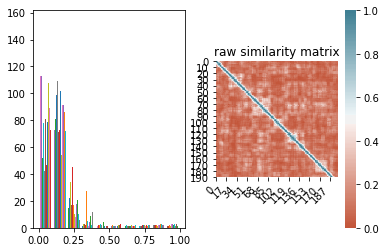

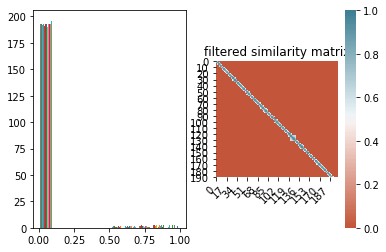

For video 7kLHJ-F33GI, 12 where found
{'n_clusters': 15, 'sim_thresh': 0.3000063890009115, 'step_size': 59.99514192872911, 'window_size': 21.1099397077962}


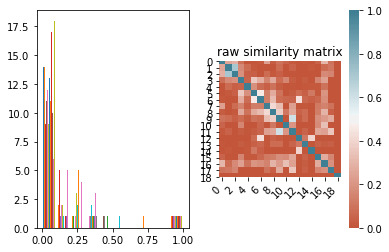

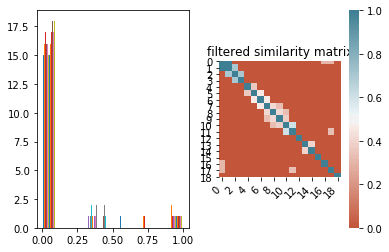

For video 7snJ1mx1EMQ, 12 where found
{'n_clusters': 14, 'sim_thresh': 0.5924873369457966, 'step_size': 10.073958555862824, 'window_size': 60.422260605496106}


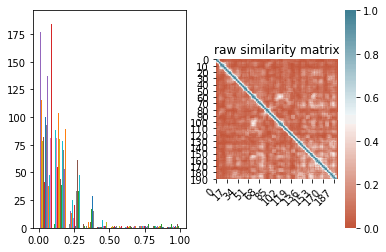

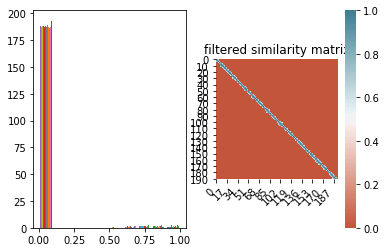

For video RIawrYLVdIw, 12 where found


In [24]:
vid_words= []
vids_shift_times = []
vids_id = []
#best_results = best_results[1:]
for vid_results in best_results: #range(0,len(best_results),n_largest_res):
    '''From the get optimized by bayesian we get that for the video '''
    # the precision is about 66% 
    vid = vid_results[0]
    params = ast.literal_eval(vid_results[2]) #{'n_clusters': 18, 'sim_thresh': 0.6, 'step_size': 49, 'window_size': 150}
    print(params)
    for key in ['n_clusters','step_size','window_size']:
        params[key] = int(params[key])# - 1
    workflow = vid_results[1] #'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering'

    groundbase = df_videos.loc[df_videos['video id'] == vid,'topic shifts(ends)'].values.tolist()[:-1]
    transcripts = transcripts_jsons[vid]
    #print(grounbase)
    _pipeline = workflow.split('-')
    filter_type = None
    mask_shape = None
    filtering = _pipeline[3]
    if filtering != 'None':
        filter_type = filtering.split('_')[0]
        mask_shape = ast.literal_eval(filtering.split('_')[1])
    '''This running may not work at first time do not give up and run it couple of times'''

    '''print('Running the following %s for video %s with params %s %s %s'
          %(workflow, vid,params,filter_type,mask_shape))'''
    shift_times,topic_words = (None,None)
    while shift_times is None and topic_words is None:
        shift_times,topic_words = pipeline.run_for_baye(groundbase,transcripts,slicing_method='sliding_window',
                              window_size=params['window_size'],step_size_sd=params['step_size'],
                              #silence_threshold=-30,slice_length=1000,step_size_audio=10,wav_file_path="../../data/raw/audio/Mod-01 Lec-01 Foundation of Scientific Computing-01.wav",                
                              vector_method='tfidf',vectorizing_params=None,
                              similarity_method='cosine',
                              filter_params={"filter_type":filter_type,
                                             "mask_shape":mask_shape,
                                             "sim_thresh":params['sim_thresh'],
                                             "is_min_thresh":True
                                             },
                             clustering_params={
                                     'algorithm':'spectral_clustering',
                                     'n_clusters':params['n_clusters']
                                     },return_value='division') or (None,None)
                
    print("For video %s, %s where found" %(vid,len(shift_times)))
    vid_words.append(topic_words)
    shift_times.append('end')
    vids_shift_times.append(shift_times)
    vids_id.append(vid)

In [25]:
for i,vid in enumerate(filtered_video):
    print('^^^^^^^^^^^^^^^^^^ %s ^^^^^^^^^^^^^^^' %(vid))
    shift = vids_shift_times[i]
    shift = shift[:-1]
    groundbase = df_videos.loc[df_videos['video id'] == vid,'topic shifts(ends)'].values.tolist()[:-1]
    print('results : %s groundbase: %s' %(shift,groundbase))
    boundryevaluation(shift,groundbase,accurrcy_shift=30)

^^^^^^^^^^^^^^^^^^ 7kLHJ-F33GI ^^^^^^^^^^^^^^^
results : [146, 318, 535, 716, 893, 1110, 1247, 1456, 1836, 2037, 2246, 2416] groundbase: [170, 299, 647, 735, 871, 1161, 1433, 1662, 1858, 2437, 2560]
TP: 7 , FP: 4, FN: 5
precision rate : 0.6363636363636364, recall rate : 0.5833333333333334 
^^^^^^^^^^^^^^^^^^ 7snJ1mx1EMQ ^^^^^^^^^^^^^^^
results : [76, 278, 552, 822, 921, 1040, 1386, 1504, 1704, 1835, 1906, 1951] groundbase: [390, 840, 1140, 1260, 1365, 1565, 1930]
TP: 3 , FP: 4, FN: 9
precision rate : 0.42857142857142855, recall rate : 0.25 
^^^^^^^^^^^^^^^^^^ RIawrYLVdIw ^^^^^^^^^^^^^^^
results : [144, 373, 704, 861, 1097, 1444, 1633, 1852, 2048, 2265, 2711, 2927] groundbase: [265, 519, 1329, 1833, 2220, 2308, 2545, 2740]
TP: 2 , FP: 6, FN: 10
precision rate : 0.25, recall rate : 0.16666666666666666 


In [26]:
print(vid_words[0][1])

['likelihood', 'estimationdeal', 'lead', 'look', 'example', 'case', 'normal', 'distribution', 'parameter', 'estimate', 'good', 'chance', 'try', 'hand', 'generating', 'estimation', 'quick', 'look', 'estimation', 'method', 'compare', 'maximum', 'likelihood', 'estimation', 'let', 'begin', 'maximum', 'likelihood', 'estimation', 'sentence', 'read', 'time', 'read', 'tongue', 'simple', 'estimation', 'provide', 'parameter', 'value', 'value', 'make', 'observed', 'sample', 'likely', 'sample', 'possible', 'sample', 'let', 'sink', 'second', 'watch', 'previous', 'video', 'series', 'remember', 'talk', 'term', 'flip', 'logic', 'relate', 'reality', 'sample', 'seem', 'say', 'let', 'make', 'likely', 'sample', 'play', 'potential', 'value', 'stop', 'find', 'value', 'give', 'high', 'probability', 'generate', 'get', 'technical', 'term', 'say', 'theta', 'hat', 'maximum', 'likelihood', 'particular', 'value', 'great', 'function', 'value', 'give', 'quick', 'note', 'use', 'maximum', 'likelihood', 'estimation', '

In [27]:
def find_top_words_of_topic(topic_words):
    for tp_i,tp_words in enumerate(topic_words):
        #
        raw_text = ' '.join(tp_words)
        myvectorizer = CountVectorizer()
        mytf = myvectorizer.fit_transform([raw_text]).toarray()
        #print(mytf)
        maxes = heapq.nlargest(3,mytf[0])
        indexes = []
        for i,bal in enumerate(mytf[0]):
            if bal in maxes:
                indexes.append(i)
        ws = [myvectorizer.get_feature_names()[_] for i,_ in enumerate(indexes)]
        print('top words for topic %s are %s' %(tp_i,ws))


In [28]:
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [195]:

""""section_as_docs = []
for subsection in total_corpus_tokenized:
    x = reduce(lambda x,y: x+y,subsection,[])
    section_as_docs.append(x)
""""

In [201]:
len(total_corpus_tokenized)

178

In [197]:
len(section_as_docs)

178

In [209]:
len(paper_subsection_one_doc[0])

1238

In [ ]:
#raw_text_all = []


##############   7kLHJ-F33GI   #############
top words for topic 0 are ['deal', 'go', 'look', 'see']
top words for topic 1 are ['estimation', 'likelihood', 'maximum', 'value']
top words for topic 2 are ['attempt', 'couple', 'probability', 'success', 'theta']
top words for topic 3 are ['function', 'go', 'look', 'point', 'take']
top words for topic 4 are ['confidence', 'equation', 'estimation', 'expect', 'information', 'value']
top words for topic 5 are ['find', 'go', 'theta']
top words for topic 6 are ['estimation', 'likelihood', 'maximum']
top words for topic 7 are ['estimation', 'likelihood', 'maximum', 'true', 'value']
top words for topic 8 are ['go', 'parameter', 'theta']
top words for topic 9 are ['find', 'get', 'go', 'little', 'sigma', 'value']
top words for topic 10 are ['equation', 'go', 'term']
top words for topic 11 are ['get', 'go', 'sum']
top words for topic 12 are ['estimation', 'may', 'use']


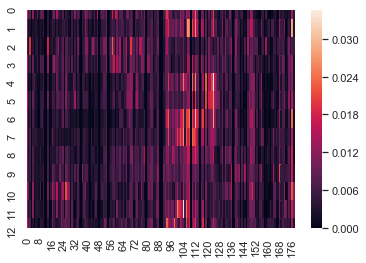

 video_shift index 0 at 146 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 1 at 318 , chapter title 22.5 Kruskal-Wallis Rank-Sum Test, chapter index: 176 
 video_shift index 2 at 535 , chapter title 7.5 Density Functions, chapter index: 57 
 video_shift index 3 at 716 , chapter title 7.7 Joint and Conditional Distributions, chapter index: 58 
 video_shift index 4 at 893 , chapter title 16.2 The Bootstrap, chapter index: 124 
 video_shift index 5 at 1110 , chapter title 16.2 The Bootstrap, chapter index: 124 
 video_shift index 6 at 1247 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 7 at 1456 , chapter title 14.6 A Note on Exponential Families and Efficient Estimators, chapter index: 104 
 video_shift index 8 at 1836 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 9 at 2037 , chapter title 21.2 Contingency tables, chapter index: 168 
 video_shift i

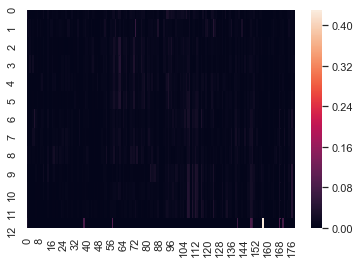

 video_shift index 0 at 76 , chapter title 12.2 Classical Statistics, chapter index: 93 
 video_shift index 1 at 278 , chapter title 8.10 Answers to Selected Exercises, chapter index: 72 
 video_shift index 2 at 552 , chapter title 7.8 Simulating Random Variables, chapter index: 62 
 video_shift index 3 at 822 , chapter title 7.8 Simulating Random Variables, chapter index: 62 
 video_shift index 4 at 921 , chapter title 12.3 Bayesian Statistics, chapter index: 94 
 video_shift index 5 at 1040 , chapter title 7.8 Simulating Random Variables, chapter index: 62 
 video_shift index 6 at 1386 , chapter title 1.3 Two-way Tables, chapter index: 5 
 video_shift index 7 at 1504 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 8 at 1704 , chapter title Examples of Mass Functions and Densities, chapter index: 73 
 video_shift index 9 at 1835 , chapter title 22.5 Kruskal-Wallis Rank-Sum Test, chapter index: 176 
 video_shift index 10 at 1906 , chapter title 22.5 K

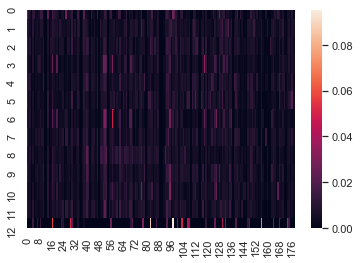

 video_shift index 0 at 144 , chapter title 3.3.2 Multiple Linear Regression, chapter index: 26 
 video_shift index 1 at 373 , chapter title 17.6 An Brief Introduction to the Bayesian Approach, chapter index: 134 
 video_shift index 2 at 704 , chapter title 10.3 Importance Sampling, chapter index: 82 
 video_shift index 3 at 861 , chapter title 16.1.1 Means, chapter index: 118 
 video_shift index 4 at 1097 , chapter title 9.5 Summary of Properties of Random Variables, chapter index: 78 
 video_shift index 5 at 1444 , chapter title 22.5 Kruskal-Wallis Rank-Sum Test, chapter index: 176 
 video_shift index 6 at 1633 , chapter title 7.5 Density Functions, chapter index: 57 
 video_shift index 7 at 1852 , chapter title Displaying Data, chapter index: 0 
 video_shift index 8 at 2048 , chapter title 5.3 Consequences of the Axioms, chapter index: 40 
 video_shift index 9 at 2265 , chapter title 12.4 Answers to Selected Exercises, chapter index: 95 
 video_shift index 10 at 2711 , chapter title

In [210]:
#chapter_titles = topic_titles
first_matching = []
subsections_as_one_doc = []
for vid_index,filt_vid in enumerate(filtered_video):
    print('##############   %s   #############' %(filt_vid))

    # let's create a dictionary of the whole of the words in the paper and the video

    # adding the video words
    raw_text_all = []
    for tp_vid in vid_words[vid_index]:
        raw_text_all = raw_text_all + tp_vid

    paper_subsection_one_doc = []
    for index,subsection in enumerate(total_corpus_tokenized):
        x = reduce(lambda x,y: x+y,subsection,[])
        paper_subsection_one_doc.append(x)
        raw_text_all = raw_text_all + x
    

    # creating dictionary of all of the words in the corpus of the video and the paper
    dictionary = Dictionary([raw_text_all])

    whole_corpus = vid_words[vid_index] + paper_subsection_one_doc

    """maybe think in the future to apply different model 
    rather than tfidf or calculate the document differntly"""
    bgw_corpus = [dictionary.doc2bow(doc) for doc in whole_corpus]
    tf_idf_model = models.TfidfModel(bgw_corpus)
    bgw_chapter = [dictionary.doc2bow(doc) for doc in paper_subsection_one_doc]
    index_sim = similarities.SparseMatrixSimilarity(tf_idf_model[bgw_chapter],
                                                    num_features=len(dictionary))
    bgw_vids = [dictionary.doc2bow(doc) for doc in vid_words[vid_index]]

    correlation = [[s for s in index_sim[tf_idf_model[doc]]] for doc in bgw_vids]
    
    #print(correlation[0])
    
    # normalizing the correlation between each topic and chapter 
    for i_t in range(len(correlation)):
        sum_ = sum(correlation[i_t])
        for ch_index in range(len(correlation[i_t])):
            correlation[i_t][ch_index] = correlation[i_t][ch_index]/sum_
    
    
    find_top_words_of_topic(vid_words[vid_index])
    
    corr_as_row = reduce(lambda x,y: x+y,correlation,[] )
    sns.heatmap(correlation,vmin=min(corr_as_row),vmax=max(corr_as_row))
    plt.show()
    #MyPlotting.similarity_matrix(correlation,min_=min(corr_as_row),
    #                             center=statistics.median(corr_as_row),
    #                             max_=max(corr_as_row),figure_path='../data/interim',title=filt_vid)
    
    
    for i,corr in enumerate(correlation):
        max_cor = max(corr)
        """print ("topic number %s in the video , topic ends at %s ,correlated chapter is %s" 
               %(i+1,vids_shift_times[vid_index][i], chapter_titles[corr.index(max_cor)]))"""
        
        
        shift = vids_shift_times[vid_index][i]
        
        #if shift != 'end':
        #    shift = "%d:%d"%(shift/60,shift%60)
        '''first_matching.append({
            'vid': filt_vid,
            ''
        })'''
        print (" video_shift index %s at %s , chapter title %s, chapter index: %s " 
               %(i,shift, topic_titles[corr.index(max_cor)],corr.index(max_cor)))

In [50]:
len(paper_subsection_one_doc)

178

# '''make the whole chapter and its subsections as one paragraph'''

In [71]:
'''finding the indexes of the chapters'''
print(main_chapter_titles)

['Displaying Data', 'Describing Distributions with Numbers', 'Correlation and Regression', 'Producing Data', 'The Basics of Probability', 'Conditional Probability and Independence', 'Random Variables and Distribution Functions', 'The Expected Value', 'Examples of Mass Functions and Densities', 'The Law of Large Numbers', 'The Central Limit Theorem', 'Overview of Estimation', 'Method of Moments', 'Unbiased Estimation', 'Maximum Likelihood Estimation', 'Interval Estimation', 'Simple Hypotheses', 'Composite Hypotheses', 'Extensions on the Likelihood Ratio', 'Procedures', 'Goodness of Fit', 'Analysis of Variance']


In [104]:
print(topic_titles.index(str(main_chapter_titles[1])))

10


In [90]:
indexes_chapter_titles = [topic_titles.index(ch_title) for ch_title in main_chapter_titles]
len(indexes_chapter_titles)
subsection_of_chapter_indexes = [range(indexes_chapter_titles[index],indexes_chapter_titles[index + 1]) for index in range(len(indexes_chapter_titles) - 1)]
subsection_of_chapter_indexes.append(range(indexes_chapter_titles[-1],len(topic_titles)))

In [96]:
# debug 
[topic_titles[i] for i in subsection_of_chapter_indexes[14]]

['Maximum Likelihood Estimation',
 '15.2 Examples',
 '15.3 Summary of Estimators',
 '15.4 Asymptotic Properties',
 '15.5 Comparison of Estimation Procedures',
 '15.6 Multidimensional Estimation',
 '15.7 The Case of Exponential Families',
 '15.8 Choice of Estimators',
 '15.9 Technical Aspects',
 '15.10 Answers to Selected Exercises']

## '''union all the subsections in the chapters'''

The main goal is to find the main chaper that it is correlated to the video
each chapter will be a single document 
then we will compare it to each founded topic



In [99]:
# debug 
#print(paper_subsection_one_doc[0])
print(len(paper_subsection_one_doc))


178


In [111]:
sum([len(paper_subsection_one_doc[i]) for i in range(0,10)])

#reduce(lambda acc,x: len(paper_subsection_one_doc[x]) +acc,range(0,10))

2687

In [114]:
chapters_as_doc = [reduce(lambda x,y: paper_subsection_one_doc[y]+x,chapter_subsec_indexes,[])
                   for chapter_subsec_indexes in subsection_of_chapter_indexes]
#len(chapters_as_doc)

22

In [121]:
#[print(len(tp_vid)) for tp_vid in vid_words[0]]
#vid_words[0][0]

##############   7kLHJ-F33GI   #############
top words for topic 0 are ['deal', 'go', 'look', 'see']
top words for topic 1 are ['estimation', 'likelihood', 'maximum', 'value']
top words for topic 2 are ['attempt', 'couple', 'probability', 'success', 'theta']
top words for topic 3 are ['function', 'go', 'look', 'point', 'take']
top words for topic 4 are ['confidence', 'equation', 'estimation', 'expect', 'information', 'value']
top words for topic 5 are ['find', 'go', 'theta']
top words for topic 6 are ['estimation', 'likelihood', 'maximum']
top words for topic 7 are ['estimation', 'likelihood', 'maximum', 'true', 'value']
top words for topic 8 are ['go', 'parameter', 'theta']
top words for topic 9 are ['find', 'get', 'go', 'little', 'sigma', 'value']
top words for topic 10 are ['equation', 'go', 'term']
top words for topic 11 are ['get', 'go', 'sum']
top words for topic 12 are ['estimation', 'may', 'use']


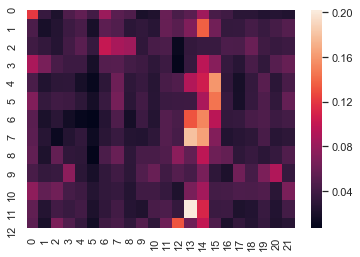

 video_shift index 0 at 146 , chapter title Displaying Data, chapter index: 0 
 video_shift index 1 at 318 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 2 at 535 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 3 at 716 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 4 at 893 , chapter title Interval Estimation, chapter index: 15 
 video_shift index 5 at 1110 , chapter title Interval Estimation, chapter index: 15 
 video_shift index 6 at 1247 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 7 at 1456 , chapter title Unbiased Estimation, chapter index: 13 
 video_shift index 8 at 1836 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 9 at 2037 , chapter title Goodness of Fit, chapter index: 20 
 video_shift index 10 at 2246 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 vide

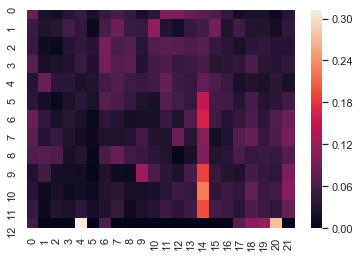

 video_shift index 0 at 76 , chapter title Overview of Estimation, chapter index: 11 
 video_shift index 1 at 278 , chapter title The Central Limit Theorem, chapter index: 10 
 video_shift index 2 at 552 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 3 at 822 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 4 at 921 , chapter title Describing Distributions with Numbers, chapter index: 1 
 video_shift index 5 at 1040 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 6 at 1386 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 7 at 1504 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 8 at 1704 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 9 at 1835 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 10 at 1906 , ch

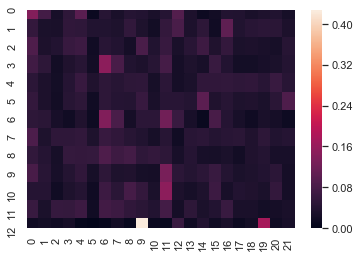

 video_shift index 0 at 144 , chapter title Displaying Data, chapter index: 0 
 video_shift index 1 at 373 , chapter title Simple Hypotheses, chapter index: 16 
 video_shift index 2 at 704 , chapter title Displaying Data, chapter index: 0 
 video_shift index 3 at 861 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 4 at 1097 , chapter title Goodness of Fit, chapter index: 20 
 video_shift index 5 at 1444 , chapter title Maximum Likelihood Estimation, chapter index: 14 
 video_shift index 6 at 1633 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 7 at 1852 , chapter title Displaying Data, chapter index: 0 
 video_shift index 8 at 2048 , chapter title Random Variables and Distribution Functions, chapter index: 6 
 video_shift index 9 at 2265 , chapter title Overview of Estimation, chapter index: 11 
 video_shift index 10 at 2711 , chapter title Overview of Estimation, chapter index: 11 
 vid

In [182]:
#chapter_titles = topic_titles
chapters_matching_topics = []
for vid_index,filt_vid in enumerate(filtered_video):
    print('##############   %s   #############' %(filt_vid))

    # let's create a dictionary of the whole of the words in the paper and the video

    # adding the video words
    raw_text_all_ch_corpus = []
    for tp_vid in vid_words[vid_index]:
        raw_text_all_ch_corpus = raw_text_all_ch_corpus + tp_vid
    
    for ch in chapters_as_doc:
        raw_text_all_ch_corpus = raw_text_all_ch_corpus + ch

    # creating dictionary of all of the words in the corpus of the video and the paper
    dictionary = Dictionary([raw_text_all_ch_corpus])

    whole_corpus = vid_words[vid_index] + chapters_as_doc

    """maybe think in the future to apply different model 
    rather than tfidf or calculate the document differntly"""
    bgw_corpus = [dictionary.doc2bow(doc) for doc in whole_corpus]
    tf_idf_model = models.TfidfModel(bgw_corpus)
    bgw_chapter = [dictionary.doc2bow(doc) for doc in chapters_as_doc]
    index_sim = similarities.SparseMatrixSimilarity(tf_idf_model[bgw_chapter],
                                                    num_features=len(dictionary))
    bgw_vids = [dictionary.doc2bow(doc) for doc in vid_words[vid_index]]

    correlation = [[s for s in index_sim[tf_idf_model[doc]]] for doc in bgw_vids]
    
    #print(correlation[0])
    
    # normalizing the correlation between each topic and chapter 
    for i_t in range(len(correlation)):
        sum_ = sum(correlation[i_t])
        for ch_index in range(len(correlation[i_t])):
            correlation[i_t][ch_index] = correlation[i_t][ch_index]/sum_
    
    
    find_top_words_of_topic(vid_words[vid_index])
    
    corr_as_row = reduce(lambda x,y: x+y,correlation,[] )
    sns.heatmap(correlation,vmin=min(corr_as_row),vmax=max(corr_as_row))
    plt.show()
    #MyPlotting.similarity_matrix(correlation,min_=min(corr_as_row),
    #                             center=statistics.median(corr_as_row),
    #                             max_=max(corr_as_row),figure_path='../data/interim',title=filt_vid)
    
    
    chapters_matching_topics.append([])
    for i,corr in enumerate(correlation):
        
        #####################################3
        '''Consider make this code in pandas'''
        ####################################33
        
        max_cor = max(corr)
        """print ("topic number %s in the video , topic ends at %s ,correlated chapter is %s" 
               %(i+1,vids_shift_times[vid_index][i], chapter_titles[corr.index(max_cor)]))"""
        
        
        shift = vids_shift_times[vid_index][i]
        
        #if shift != 'end':
        #    shift = "%d:%d"%(shift/60,shift%60)

        chapters_matching_topics[vid_index].append(main_chapter_titles[corr.index(max_cor)])
        
        print (" video_shift index %s at %s , chapter title %s, chapter index: %s " 
               %(i,shift, main_chapter_titles[corr.index(max_cor)],corr.index(max_cor)))

In [183]:
df_main_ch_corr = pd.DataFrame.from_records(correlation)

In [184]:
#df_main_ch_corr.var()

In [185]:
'''Make a majority vote'''


'''Consider make this code in pandas'''

#max(set(chapters_matching_topics[2]),key=chapters_matching_topics[2].count)
#dominent_chapters = [mode(ch) for ch in chapters_matching_topics]
#dominent_chapters[0]

chapter_matching_counts_max = [max([vd_topic.count(ch) for ch in vd_topic]) for vd_topic in chapters_matching_topics]
dominent_chapters = []
for vid_index,max_count in zip(range(len(chapters_matching_topics)),chapter_matching_counts_max):
    print("####### #######")
    dom_chap = list(set([ch for ch in chapters_matching_topics[vid_index] if chapters_matching_topics[vid_index].count(ch) == max_count]))
    print(dom_chap)
    # if we have absulote majority on topic
    if len(dominent_chapters) == 1:
        dominent_chapters.append(dom_chap[0])
    else:
        '''####################################################3'''
        '''Think in the future maybe change this code ! making the decision based on something statistic else'''
        '''####################################################3'''
        # draw between topics, decide which one by taking this with the high variance
        index_winner = 0
        for j_dom in range(len(dom_chap)):
            first = df_main_ch_corr.var()[main_chapter_titles.index(dom_chap[index_winner])]
            print(first)
            second = df_main_ch_corr.var()[main_chapter_titles.index(dom_chap[j_dom])]
            print(second)
            if first < second:
                index_winner = j_dom
        dominent_chapters.append(dom_chap[index_winner])

####### #######
['Maximum Likelihood Estimation']
0.0005682968025171266
0.0005682968025171266
####### #######
['Maximum Likelihood Estimation']
####### #######
['Displaying Data', 'Random Variables and Distribution Functions', 'Overview of Estimation']
0.0008569907545767592
0.0008569907545767592
0.0008569907545767592
0.0015622615633955695
0.0015622615633955695
0.001650319212724502


In [188]:
print(dominent_chapters)
#chapter_matching_counts_max

['Maximum Likelihood Estimation', 'Maximum Likelihood Estimation', 'Overview of Estimation']


In [187]:
subsection_of_chapter_indexes[14]

range(106, 116)

In [200]:
section_as_docs[115]

[]

In [ ]:
'''Comparing the topic to the subsection of the main chapter'''

##############   7kLHJ-F33GI   #############
range(106, 116)
top words for topic 0 are ['deal', 'go', 'look', 'see']
top words for topic 1 are ['estimation', 'likelihood', 'maximum', 'value']
top words for topic 2 are ['attempt', 'couple', 'probability', 'success', 'theta']
top words for topic 3 are ['function', 'go', 'look', 'point', 'take']
top words for topic 4 are ['confidence', 'equation', 'estimation', 'expect', 'information', 'value']
top words for topic 5 are ['find', 'go', 'theta']
top words for topic 6 are ['estimation', 'likelihood', 'maximum']
top words for topic 7 are ['estimation', 'likelihood', 'maximum', 'true', 'value']
top words for topic 8 are ['go', 'parameter', 'theta']
top words for topic 9 are ['find', 'get', 'go', 'little', 'sigma', 'value']
top words for topic 10 are ['equation', 'go', 'term']
top words for topic 11 are ['get', 'go', 'sum']
top words for topic 12 are ['estimation', 'may', 'use']


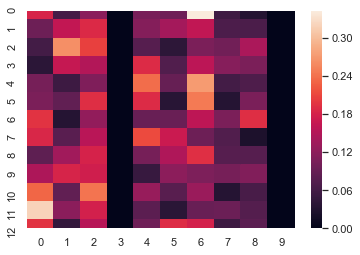

 video_shift index 0 at 146 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 1 at 318 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 2 at 535 , chapter title 15.2 Examples, chapter index: 107 
 video_shift index 3 at 716 , chapter title 15.5 Comparison of Estimation Procedures, chapter index: 110 
 video_shift index 4 at 893 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 5 at 1110 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 6 at 1247 , chapter title Maximum Likelihood Estimation, chapter index: 106 
 video_shift index 7 at 1456 , chapter title 15.5 Comparison of Estimation Procedures, chapter index: 110 
 video_shift index 8 at 1836 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 9 at 2037 , chapter title 15.2 Examples, chapter index: 107 
 video_shift index 10 at 2

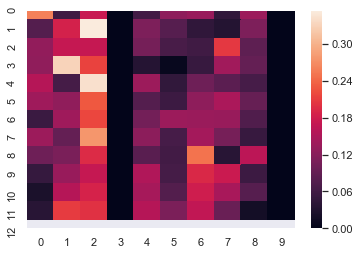

 video_shift index 0 at 76 , chapter title Maximum Likelihood Estimation, chapter index: 106 
 video_shift index 1 at 278 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 2 at 552 , chapter title 15.8 Choice of Estimators, chapter index: 113 
 video_shift index 3 at 822 , chapter title 15.2 Examples, chapter index: 107 
 video_shift index 4 at 921 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 5 at 1040 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 6 at 1386 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 7 at 1504 , chapter title 15.3 Summary of Estimators, chapter index: 108 
 video_shift index 8 at 1704 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 9 at 1835 , chapter title 15.7 The Case of Exponential Families, chapter index: 112 
 video_shift index 10 at 1906 , chapter title 15.3 Summary of Est

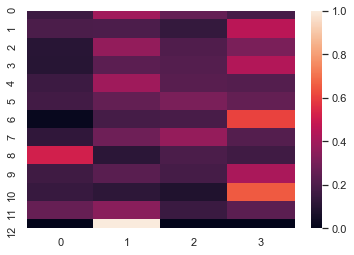

 video_shift index 0 at 144 , chapter title 12.2 Classical Statistics, chapter index: 93 
 video_shift index 1 at 373 , chapter title 12.4 Answers to Selected Exercises, chapter index: 95 
 video_shift index 2 at 704 , chapter title 12.2 Classical Statistics, chapter index: 93 
 video_shift index 3 at 861 , chapter title 12.4 Answers to Selected Exercises, chapter index: 95 
 video_shift index 4 at 1097 , chapter title 12.2 Classical Statistics, chapter index: 93 
 video_shift index 5 at 1444 , chapter title 12.3 Bayesian Statistics, chapter index: 94 
 video_shift index 6 at 1633 , chapter title 12.4 Answers to Selected Exercises, chapter index: 95 
 video_shift index 7 at 1852 , chapter title 12.3 Bayesian Statistics, chapter index: 94 
 video_shift index 8 at 2048 , chapter title Overview of Estimation, chapter index: 92 
 video_shift index 9 at 2265 , chapter title 12.4 Answers to Selected Exercises, chapter index: 95 
 video_shift index 10 at 2711 , chapter title 12.4 Answers to S

In [215]:
#chapter_titles = topic_titles
for vid_index,filt_vid in enumerate(filtered_video):
    print('##############   %s   #############' %(filt_vid))

    # let's create a dictionary of the whole of the words in the paper and the video

    # adding the video words
    raw_text_ = []
    for tp_vid in vid_words[vid_index]:
        raw_text_ = raw_text_ + tp_vid
    
    curr_subsec_indes = subsection_of_chapter_indexes[main_chapter_titles.index(dominent_chapters[vid_index])]
    print(curr_subsec_indes)
    sub_as_d = []
    for s_i in curr_subsec_indes:
        sub_as_d.append(paper_subsection_one_doc[s_i]) 
        raw_text_ = raw_text_ + paper_subsection_one_doc[s_i]

    # creating dictionary of all of the words in the corpus of the video and the paper
    dictionary = Dictionary([raw_text_])

    whole_corpus = vid_words[vid_index] + sub_as_d

    """maybe think in the future to apply different model 
    rather than tfidf or calculate the document differntly"""
    bgw_corpus = [dictionary.doc2bow(doc) for doc in whole_corpus]
    tf_idf_model = models.TfidfModel(bgw_corpus)
    bgw_chapter = [dictionary.doc2bow(doc) for doc in sub_as_d]
    index_sim = similarities.SparseMatrixSimilarity(tf_idf_model[bgw_chapter],
                                                    num_features=len(dictionary))
    bgw_vids = [dictionary.doc2bow(doc) for doc in vid_words[vid_index]]

    correlation = [[s for s in index_sim[tf_idf_model[doc]]] for doc in bgw_vids]
    
    #print(correlation[0])
    
    # normalizing the correlation between each topic and chapter 
    for i_t in range(len(correlation)):
        sum_ = sum(correlation[i_t])
        for ch_index in range(len(correlation[i_t])):
            correlation[i_t][ch_index] = correlation[i_t][ch_index]/sum_
    
    
    find_top_words_of_topic(vid_words[vid_index])
    
    corr_as_row = reduce(lambda x,y: x+y,correlation,[] )
    sns.heatmap(correlation,vmin=min(corr_as_row),vmax=max(corr_as_row))
    plt.show()
    #MyPlotting.similarity_matrix(correlation,min_=min(corr_as_row),
    #                             center=statistics.median(corr_as_row),
    #                             max_=max(corr_as_row),figure_path='../data/interim',title=filt_vid)
    
    
    chapters_matching_topics.append([])
    for i,corr in enumerate(correlation):
        
        #####################################3
        '''Consider make this code in pandas'''
        ####################################33
        
        max_cor = max(corr)
        """print ("topic number %s in the video , topic ends at %s ,correlated chapter is %s" 
               %(i+1,vids_shift_times[vid_index][i], chapter_titles[corr.index(max_cor)]))"""
        
        
        shift = vids_shift_times[vid_index][i]
        
        #if shift != 'end':
        #    shift = "%d:%d"%(shift/60,shift%60)

        chapters_matching_topics[vid_index].append(main_chapter_titles[corr.index(max_cor)])
        
        print (" video_shift index %s at %s , chapter title %s, chapter index: %s " 
               %(i,shift, topic_titles[curr_subsec_indes[0] +corr.index(max_cor)],curr_subsec_indes[0]+ corr.index(max_cor)))